In [2]:
from __future__ import  absolute_import
from __future__ import  division
from __future__ import  print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2019)

In [44]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                   [9.779],[6.182],[7.59],[2.167],[7.042],
                   [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)

y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                   [3.366],[2.596],[2.53],[1.221],[2.827],
                   [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

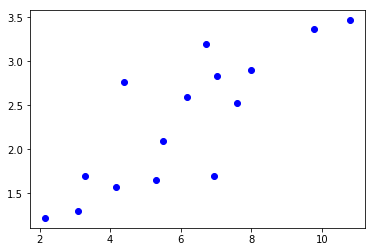

In [45]:
%matplotlib inline

plt.plot(x_train,y_train,'bo')

In [46]:
x = tf.constant(x_train,name='x')
y = tf.constant(y_train,name='y')

w = tf.Variable(initial_value=tf.random_normal(shape=(),seed=2019),dtype=tf.float32, name="weight")
b = tf.Variable(initial_value=0, dtype=tf.float32, name="biase")

with tf.variable_scope("Linear_Model"):
    y_pred = w*x+b

In [47]:
print(w.name)
print(y_pred.name)

weight_2:0
Linear_Model_2/add:0


In [48]:
sess = tf.InteractiveSession()

sess.run(tf.global_variables_initializer())

/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


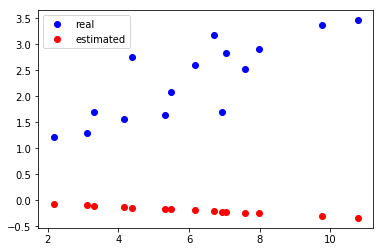

In [49]:
y_pred_numpy = y_pred.eval(session=sess)

plt.plot(x_train,y_train, 'bo', label="real")
plt.plot(x_train,y_pred_numpy,'ro',label="estimated")
plt.legend()

In [50]:
loss = tf.reduce_mean(tf.square(y-y_pred))

print(loss.eval(session=sess))

w_grad,b_grad = tf.gradients(loss,[w,b])

print("w_grad: %.4f" % w_grad.eval(session=sess))
print('b_brad: %.4f' % b_grad.eval(session=sess))

lr = 1e-2
w_update = w.assign_sub(lr*w_grad)
b_update = b.assign_sub(lr*b_grad)

6.9620914
w_grad: -33.7301
b_brad: -5.0289


In [51]:
sess.run([w_update,b_update])

[0.3059657, 0.050288744]

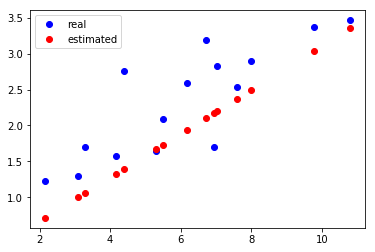

In [52]:
y_pred_numpy = y_pred.eval(session=sess)

plt.plot(x_train,y_train, 'bo', label="real")
plt.plot(x_train,y_pred_numpy,'ro',label="estimated")
plt.legend()

<IPython.core.display.Javascript object>


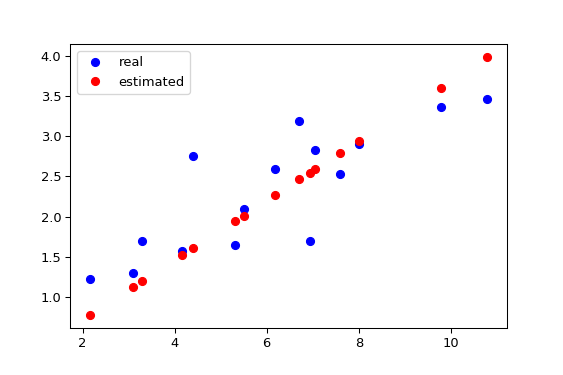

epoch: 0, loss: 0.37979334592819214
epoch: 1, loss: 0.25516530871391296
epoch: 2, loss: 0.2524365186691284
epoch: 3, loss: 0.25196573138237
epoch: 4, loss: 0.2515389323234558
epoch: 5, loss: 0.2511150538921356
epoch: 6, loss: 0.2506934106349945
epoch: 7, loss: 0.2502738833427429
epoch: 8, loss: 0.24985650181770325
epoch: 9, loss: 0.24944134056568146


In [54]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
sess.run(tf.global_variables_initializer())

for e in range(10):
    sess.run([w_update,b_update])
    y_pred_numpy = y_pred.eval(session=sess)
    loss_numpy = loss.eval(session=sess)
    
    ax.clear()
    ax.plot(x_train,y_train, 'bo', label='real')
    ax.plot(x_train, y_pred_numpy, 'ro',label="estimated")
    ax.legend()
    fig.canvas.draw()
    plt.pause(0.5)
    
    print('epoch: {}, loss: {}'.format(e,loss_numpy))

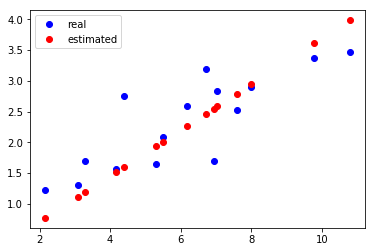

In [55]:
%matplotlib inline
plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

In [56]:
sess.close()

# 多项式回归

In [57]:
tf.reset_default_graph()

In [59]:
w_target = np.array([0.5,3,2.4])
b_target = np.array([0.9])
f_des = 'y={:.2f} + {:.2f}*x +{:.2f}*x^2 + {:.2f}*x^3'.format(b_target[0],w_target[0]+ w_target[1]+w_target[2])

IndexError: tuple index out of range